## Neural Net(MLP) From Scratch - L Rohan  

## Objective

- We will see the neural net given below, find out all the respective partial derivatives and these derivatives will go into our backprop function to find the new weights
- for forward prop we just the calculate the final expression from the given neural net and apply our loss after performing for forward prop for each data point in our dataset
- i am hoping that you know that when i say data point in the dataset i mean data point's features or cols will be passed in out forward and backward prop to do the appropriate caluclations

## Back Propagation

<img src='https://i.imgur.com/seSGbNS.png'>

<pre>
1. if you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]
2. the final output of this graph is a value L which is computed as (Y-Y')^2
</pre>

In [1]:
import pickle
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]                                                   
y = data[:, -1]
print(X.shape, y.shape)

(506, 6)
(506, 5) (506,)


In [2]:
# running all the libraries

import numpy as np
import random
from tqdm import tqdm
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.metrics import mean_squared_error as mse

### Task 1 

In [3]:
def sigmoid(x, w):
    z = (np.sin(x[2] * w[2]) * ((x[3]*w[3]) + (x[4]*w[4])) + w[7])
    ans = 1 / (1 + np.exp(-z))
    
    return ans

In [4]:
def get_dict(x, y, y_pr, w):
    
    my_di = {'dL/dy_pr': -2*(y-y_pr), 'dy_pr/d_tanh_op': 1, 
              'd_tanh_op/d_+_op': 1 - ((np.tanh(w[6]+np.exp(((x[0]*w[0]) + (x[1]*w[1]))**2 + w[5])))*
              (np.tanh(w[6]+np.exp(((x[0]*w[0]) + (x[1]*w[1]))**2 + w[5])))), 
              'd_+_op/d_w7': 1, 'd_+_op/d_exp_op': 1, 
              'd_exp_op/d_+_op': np.exp(((x[0]*w[0]) + (x[1]*w[1]))**2 + w[5]), 
              'd_+_op/d_w6': 1, 'd_+_op/d_*_op': 1, 'd_*_op/d_+_op': 2*((x[0]*w[0]) + (x[1]*w[1])), 
              'd_*_op/d_w1': x[0], 'd_*_op/d_w2': x[1], 'dy_pr/d_*_op': 1, 
              'd_*_op/d_w9': sigmoid(x, w), 
              'd_*_op/d_sig_op': w[8], 'd_sig_op/d_+_op': sigmoid(x, w) * (1 - sigmoid(x, w)),
              'd_+_op/d_w8': 1, 'd_*_op/d_sin_op': (x[3]*w[3]) + (x[4]*w[4]), 
              'd_sin_op/d_*_op': np.cos(x[2]*w[2]), 'd_*_op/d_w3': x[2], 
              'd_*_op/d_++_op': np.sin(x[2]*w[2]), 'd_*_op/d_w4': x[3], 
              'd_*_op/d_w5': x[4]}
    
    return my_di

### Dictionary

- creating a dictionary is very important as it will help us in our backward prop
- the whole idea of backward prop was to save time and space and for that we will store our partial derivatives in our dictionary above 
- i request to calculate your own derivatives for each weight from the neural net picture above and store the intermeditate derivatives which is used in derivatives of more than one weights in the dictionary above
- this helps us in not calculating it again and again 
- each and every key in our dictionary is partial derivative

In [5]:
def forward_prop(x, y, w):
    """
        this function calculates loss for a single data point 
    
    """
    lhs = np.tanh(np.exp((x[0]*w[0] + x[1]*w[1])**2 + w[5]) + w[6])
    rhs = sigmoid(x, w) * w[8]
    y_pred = lhs + rhs
    reg_loss = (y - y_pred)**2
    
    our_var_di = get_dict(x, y, y_pred, w)
    
#     var_di = get_dict(x, w)
    
    return reg_loss, our_var_di, y_pred

In [6]:
def our_back_prop(di):
    grads=[]
    
    w_0=(di['d_tanh_op/d_+_op']*di['d_exp_op/d_+_op']*di['d_*_op/d_+_op']*di['d_*_op/d_w1'])
    grads.append(w_0)
    
    w_1=(di['d_tanh_op/d_+_op']*di['d_exp_op/d_+_op']*di['d_*_op/d_+_op']*di['d_*_op/d_w2'])
    grads.append(w_1)
    
    w_2=(di['dy_pr/d_*_op']*di['d_*_op/d_sig_op']*di['d_sig_op/d_+_op']*di['d_+_op/d_*_op']*di['d_*_op/d_sin_op']*
         di['d_sin_op/d_*_op']*di['d_*_op/d_w3'])
    grads.append(w_2)
    
    w_3=(di['dy_pr/d_*_op']*di['d_*_op/d_sig_op']*di['d_sig_op/d_+_op']*di['d_+_op/d_*_op']*di['d_*_op/d_++_op']*
          di['d_+_op/d_*_op']*di['d_*_op/d_w4'])
    grads.append(w_3)
    
    w_4=(di['dy_pr/d_*_op']*di['d_*_op/d_sig_op']*di['d_sig_op/d_+_op']*di['d_+_op/d_*_op']*di['d_*_op/d_++_op']*
          di['d_+_op/d_*_op']*di['d_*_op/d_w5'])
    grads.append(w_4)
    
    w_5=(di['dy_pr/d_tanh_op']*di['d_tanh_op/d_+_op']*di['d_+_op/d_exp_op']*di['d_exp_op/d_+_op']*
         di['d_+_op/d_w6'])
    grads.append(w_5)
    
    w_6=(di['dy_pr/d_tanh_op']*di['d_tanh_op/d_+_op']*di['d_+_op/d_w7'])
    grads.append(w_6)
    
    w_7=(di['dy_pr/d_*_op']*di['d_*_op/d_sig_op']*di['d_sig_op/d_+_op']*di['d_+_op/d_w8'])
    grads.append(w_7)
    
    w_8=(di['dy_pr/d_*_op']*di['d_*_op/d_w9'])
    grads.append(w_8)
    
    return grads

### backprop

- as you can see above for each weight i have written my partial derivative which i have calulated by hand from the neural net

In [7]:
# # testing our back_prop

# test_w = np.array([0.23796463, 0.54422923, 0.36995517, 0.60392004, 0.6257203 ,
#        0.06552886, 0.01316799, 0.83746908, 0.25935401])

# loss, my_dic, my_y_pred = forward_prop(X[0], y[0], test_w)
# my_grads = our_back_prop(my_dic)

# print(loss, my_y_pred)
# print(my_grads)

In [8]:
def update_weights(w, j, e):
    w_pos = []
    w_neg = []
    for i in range(len(w)):
        if(i==j):
            w_pos.append(w[i]+e)
            w_neg.append(w[i]-e)
        else:
            w_pos.append(w[i])
            w_neg.append(w[i])
    
    return np.array(w_pos), np.array(w_neg)

In [9]:
# for j in range(len(test_w)):
#     pos, neg = update_weights(test_w, j, e=1e-7)
#     print(pos)
#     print(neg)
#     print("="*30)

In [10]:
def gradient_checking(x, y, w, e):
    loss, my_dic, my_y_pred = forward_prop(x, y, w)
    grad = our_back_prop(my_dic)
    
    grad_approx_ls = []
    for i in range(len(w)):
        w_1, w_2 = update_weights(w, i, e)
        loss_1, my_dic_1, y_pred_1 = forward_prop(x, y, w_1)
        loss_2, my_dic_2, y_pred_2 = forward_prop(x, y, w_2)
#         print('loss1: {0}, loss2: {1}'.format(y_pred_1, y_pred_2))
        grad_approx=(y_pred_1-y_pred_2)/(2*e)
        grad_approx_ls.append(grad_approx)
#         print('grad_approx', grad_approx)
#         num=np.linalg.norm(grad-grad_approx)
#         den=np.linalg.norm(grad)+np.linalg.norm(grad_approx)
#         difference=num/den
    
    
    for j in range(len(w)):
        num = np.linalg.norm(grad[j] - grad_approx_ls[j])
        denom = np.linalg.norm(grad[j]) + np.linalg.norm(grad_approx_ls[j])
        checked = num / denom 
        
        if checked <= 1e-7:
            print('weight {0} is correct: {1}'.format(j+1, checked))
        else:
            print('weight {0} is in-correct: {1}'.format(j+1, checked))
        

### gradient checknig 
- it is very important and tells us if our weights are correct or not and if not we have made a mistake in our calculations of our derivatives

In [11]:
def init_weights():
    random.seed(3)
    w =[]
    for i in range(9):
        w.append(random.uniform(0,1))
        
        
    return np.array(w)

In [12]:
weights = init_weights()

weights

array([0.23796463, 0.54422923, 0.36995517, 0.60392004, 0.6257203 ,
       0.06552886, 0.01316799, 0.83746908, 0.25935401])

In [13]:
checked_grads = gradient_checking(X[0], y[0], weights, 1e-7)

weight 1 is correct: 6.76126152749488e-11
weight 2 is correct: 6.171609967754819e-09
weight 3 is correct: 1.0751353249967449e-09
weight 4 is correct: 1.586788074733842e-08
weight 5 is correct: 2.141209937274392e-08
weight 6 is correct: 8.67101855038544e-13
weight 7 is correct: 4.0151299583809133e-10
weight 8 is correct: 3.172831924446384e-09
weight 9 is correct: 2.908197556086923e-10


### Task 2: SGD 

In [14]:
def sgd_get_dict(x, y, y_pr, w):
    
    my_di = {'dL/dy_pr': -2*(y-y_pr), 'dy_pr/d_tanh_op': 1, 
              'd_tanh_op/d_+_op': 1 - ((np.tanh(w[6]+np.exp(((x[0]*w[0]) + (x[1]*w[1]))**2 + w[5])))*
              (np.tanh(w[6]+np.exp(((x[0]*w[0]) + (x[1]*w[1]))**2 + w[5])))), 
              'd_+_op/d_w7': 1, 'd_+_op/d_exp_op': 1, 
              'd_exp_op/d_+_op': np.exp(((x[0]*w[0]) + (x[1]*w[1]))**2 + w[5]), 
              'd_+_op/d_w6': 1, 'd_+_op/d_*_op': 1, 'd_*_op/d_+_op': 2*((x[0]*w[0]) + (x[1]*w[1])), 
              'd_*_op/d_w1': x[0], 'd_*_op/d_w2': x[1], 'dy_pr/d_*_op': 1, 
              'd_*_op/d_w9': sigmoid(x, w), 
              'd_*_op/d_sig_op': w[8], 'd_sig_op/d_+_op': sigmoid(x, w) * (1 - sigmoid(x, w)),
              'd_+_op/d_w8': 1, 'd_*_op/d_sin_op': (x[3]*w[3]) + (x[4]*w[4]), 
              'd_sin_op/d_*_op': np.cos(x[2]*w[2]), 'd_*_op/d_w3': x[2], 
              'd_*_op/d_++_op': np.sin(x[2]*w[2]), 'd_*_op/d_w4': x[3], 
              'd_*_op/d_w5': x[4]}
    
    return my_di
    

In [15]:
def sgd_forward_prop(x, y, w):
    """
        this function calculates loss for a single data point 
    
    """
    lhs = np.tanh(np.exp((x[0]*w[0] + x[1]*w[1])**2 + w[5]) + w[6])
    rhs = sigmoid(x, w) * w[8]
    y_pred = lhs + rhs
    reg_loss = (y - y_pred)**2
    
    our_var_di = sgd_get_dict(x, y, y_pred, w)
    
#     var_di = get_dict(x, w)
    
    return reg_loss, our_var_di, y_pred

In [16]:
def sgd_backward_prop(di):
    grads=[]
    
    w_0=(di['dL/dy_pr']*di['dy_pr/d_tanh_op']*di['d_tanh_op/d_+_op']*di['d_+_op/d_exp_op']*di['d_exp_op/d_+_op']*
         di['d_+_op/d_*_op']*((di['d_*_op/d_+_op']*di['d_+_op/d_*_op'])+(di['d_*_op/d_+_op']*di['d_+_op/d_*_op']))*
         di['d_*_op/d_w1'])
    grads.append(w_0)
    
    w_1=(di['dL/dy_pr']*di['dy_pr/d_tanh_op']*di['d_tanh_op/d_+_op']*di['d_+_op/d_exp_op']*di['d_exp_op/d_+_op']*
         di['d_+_op/d_*_op']*((di['d_*_op/d_+_op']*di['d_+_op/d_*_op'])+(di['d_*_op/d_+_op']*di['d_+_op/d_*_op']))*
         di['d_*_op/d_w2'])
    grads.append(w_1)
    
    w_2=(di['dL/dy_pr']*di['dy_pr/d_*_op']*di['d_*_op/d_sig_op']*di['d_sig_op/d_+_op']*di['d_+_op/d_*_op']*di['d_*_op/d_sin_op']*
         di['d_sin_op/d_*_op']*di['d_*_op/d_w3'])
    grads.append(w_2)
    
    w_3=(di['dL/dy_pr']*di['dy_pr/d_*_op']*di['d_*_op/d_sig_op']*di['d_sig_op/d_+_op']*di['d_+_op/d_*_op']*di['d_*_op/d_++_op']*
          di['d_+_op/d_*_op']*di['d_*_op/d_w4'])
    grads.append(w_3)
    
    w_4=(di['dL/dy_pr']*di['dy_pr/d_*_op']*di['d_*_op/d_sig_op']*di['d_sig_op/d_+_op']*di['d_+_op/d_*_op']*di['d_*_op/d_++_op']*
          di['d_+_op/d_*_op']*di['d_*_op/d_w5'])
    grads.append(w_4)
    
    w_5=(di['dL/dy_pr']*di['dy_pr/d_tanh_op']*di['d_tanh_op/d_+_op']*di['d_+_op/d_exp_op']*di['d_exp_op/d_+_op']*
         di['d_+_op/d_w6'])
    grads.append(w_5)
    
    w_6=(di['dL/dy_pr']*di['dy_pr/d_tanh_op']*di['d_tanh_op/d_+_op']*di['d_+_op/d_w7'])
    grads.append(w_6)
    
    w_7=(di['dL/dy_pr']*di['dy_pr/d_*_op']*di['d_*_op/d_sig_op']*di['d_sig_op/d_+_op']*di['d_+_op/d_w8'])
    grads.append(w_7)
    
    w_8=(di['dL/dy_pr']*di['dy_pr/d_*_op']*di['d_*_op/d_w9'])
    grads.append(w_8)
    
    return grads
    

In [17]:
def sgd_vanilla(x, y, epoch, learning_rate):
    w = [np.random.uniform(-0.01, 0.01) for i in range(9)]
    our_loss = []
    epoch_ls = []
    for i in range(epoch):
        epoch_ls.append(i)
        w_o = w
        epoch_y_pred=[]
        for j in range(len(x)):
            loss, my_dict,y_pred = sgd_forward_prop(x[j], y[j], w_o)
            my_grad = sgd_backward_prop(my_dict)
            
            for k in range(len(w)):
                w[k] += -learning_rate * my_grad[k]
            
            epoch_y_pred.append(y_pred)
        
        epoch_loss = mse(y, epoch_y_pred)
        our_loss.append(epoch_loss)
#         print('Epoch: {0}, The loss: {1}'.format(i, epoch_loss))    
            
                
    return w, our_loss, epoch_ls

### SGD with Vanilla Optimization 

In [18]:
v_w, v_loss, v_epochs = sgd_vanilla(X, y, epoch=70, learning_rate=0.0001)

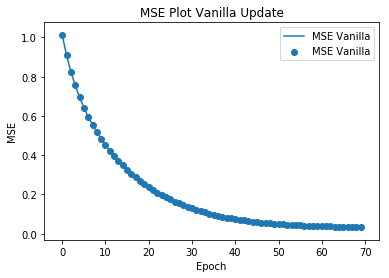

In [19]:
plt.plot(v_epochs, v_loss, label='MSE Vanilla')
plt.scatter(v_epochs, v_loss, label='MSE Vanilla')
plt.title("MSE Plot Vanilla Update")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Observations:

- we can see that vanilla update formula takes more number of epochs to converge 
- the loss gradually decreases but converges in the end

In [20]:
### SGD with Vanilla Optimization def sgd_momentum(x, y, epoch, learning_rate, mu):
    w = [np.random.uniform(-0.01, 0.01) for i in range(9)]
    v = [0 for i in range(9)]
    our_loss = []
    epoch_ls = []
    for i in range(epoch):
        epoch_ls.append(i)
        w_o = w
        v_o = v
        epoch_y_pred = []
        
        for j in range(len(x)):
            loss, my_dict, my_y_pred = sgd_forward_prop(x[j], y[j], w_o)
            epoch_y_pred.append(my_y_pred)
            my_grad = sgd_backward_prop(my_dict)
            
            for k in range(len(w)):
                v[k] = mu * v_o[k] - learning_rate * my_grad[k] 
                w[k] += v[k]
            

        epoch_loss = mse(y, epoch_y_pred)
        our_loss.append(epoch_loss)
#         print('Epoch: {0}, loss: {1}'.format(i, epoch_loss))
                
    return w, our_loss, epoch_ls

### SGD with momentum Optimization 

In [21]:
momentum_w, momentum_loss, momentum_epoch = sgd_momentum(X, y, 15, 0.0001, 0.9)

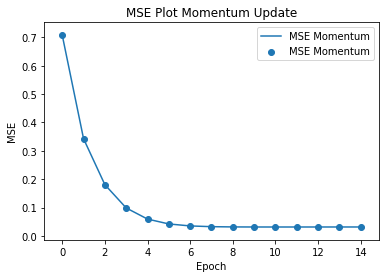

In [22]:
plt.plot(momentum_epoch,momentum_loss, label='MSE Momentum')
plt.scatter(momentum_epoch,momentum_loss,label='MSE Momentum')
plt.title("MSE Plot Momentum Update")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Observations:

- momentum loss, drops very quickly as compared to vanilla loss
- it takes very less epochs as well to converge 

In [23]:
def sgd_adam(x, y, epoch, learning_rate, beta1, beta2, eps):
    w = [np.random.uniform(-0.01, 0.01) for i in range(9)]
    v = [0 for i in range(9)]
    m = [0 for i in range(9)]
    our_loss = []
    epoch_ls = []
    for i in range(epoch):
        epoch_ls.append(i)
        w_o = w
        v_o = v
        m_o = m
        epoch_y_pred = []
        
        for j in range(len(x)):
            loss, my_dict, my_y_pred = sgd_forward_prop(x[j], y[j], w_o)
            epoch_y_pred.append(my_y_pred)
            my_grad = sgd_backward_prop(my_dict)
            
            for k in range(len(w)):
                m[k] = beta1 * m_o[k] + (1-beta1)* my_grad[k]
                v[k] = beta2 * v_o[k] + (1-beta2) * (my_grad[k]**2) 
                w[k] += -learning_rate * m[k] / (np.sqrt(v[k]) + eps)
                
                
        epoch_loss = mse(y, epoch_y_pred)
        our_loss.append(epoch_loss)
#         print('Epoch: {0}, loss: {1}'.format(i, epoch_loss))
                
    return w, our_loss, epoch_ls 

### SGD with Adam Optimization 

In [24]:
adam_w, adam_loss, adam_epoch = sgd_adam(X, y, 30, 0.0001, 0.9, 0.999, 0.00000001)

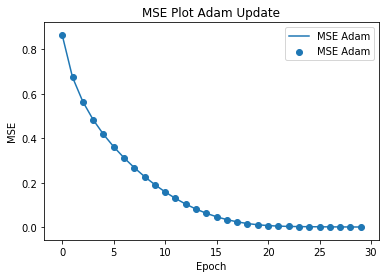

In [25]:
plt.plot(adam_epoch, adam_loss, label='MSE Adam')
plt.scatter(adam_epoch, adam_loss,label='MSE Adam')
plt.title("MSE Plot Adam Update")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

## Observations:

- smoothest one till now is adam's loss
- it creates a perfect loss curve and converges in 30 epochs


## Conclusions

- we can see that momentum loss takes lesser epochs than vanilla and adam's
- the quickest loss reduction and convergence happens in momentum update formula

## Links

- These are some links which you should go through before doing all the above steps
- it will help with your understanding and help you do it faster
- Note that, everything here has been done from scratch and it's for deeper understanding
- where as in real world you can use tensorflow and keras to do all the work

- https://www.youtube.com/watch?v=i94OvYb6noo#t=1m33s

- https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9

- https://www.youtube.com/watch?v=gYpoJMlgyXA

- http://cs231n.github.io/neural-networks-3/